### Import

In [1]:
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage 
import os
import pandas as pd
import re
import statistics
import time

#### Input data structure:

In [ ]:
{'question': 'For every 12 ... ', 'answer': 'There are 144/12 = <<144/12=12>>12 ... \n#### 12'}

In [ ]:
# not implemented
"""
from dotenv import load_dotenv
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
"""

#### Ex 1:

In [2]:
data = []

with open('math_problems.jsonl', 'r', encoding='utf-8') as f_in:
    for line in f_in:
        data.append(eval(line))

data_df = pd.DataFrame(data)
data_df = data_df.explode(['question', 'answer'])

In [3]:
data_df['target'] = data_df['answer'].apply(lambda x: int(x.split('####')[-1].strip()))

In [4]:
data_df.head()

,question,answer,target
0,"For every 12 cans you recycle, you receive $0....",There are 144/12 = <<144/12=12>>12 sets of 12 ...,12
1,Betty picked 16 strawberries. Matthew picked 2...,Matthew picked 16 + 20 = <<16+20=36>>36 strawb...,40
2,Jack has a stack of books that is 12 inches th...,There are 960 pages because 80 x 12 = <<80*12=...,160
3,James dumps his whole collection of 500 Legos ...,James starts with 500 Legos and uses half of t...,245
4,Ines had $20 in her purse. She bought 3 pounds...,Ines bought 3 pounds of peaches for 3 peaches ...,14


In [5]:
# Initialize the Mistral client with your API key
MODEL = "mistral-small-latest"
TEMPERATURE = 0
TOP_P = 1

In [6]:
# Function to open and read the API key file
def open_file(filepath):
    with open(filepath, "r", encoding='utf-8') as infile:
        return infile.read()

# Function to interact with the Mistral API and get a response
def get_mistral_response(user_content):
    
    # Load api key
    api_key = open_file("mistral_api_key.txt")
    client = MistralClient(api_key=api_key)

    # Prepare a List of ChatMessage objects with the user's content
    messages = [
        ChatMessage(role="user", content=user_content),
        ]
    
    # Get the response from the Mistral API without streaming
    chat_response = client.chat(
        model=MODEL, 
        temperature=TEMPERATURE,
        top_p=TOP_P,
        messages=messages,
        )
    
    try:
        # Extract the content from the response
        response_content = " ".join([choice.message.content for choice in chat_response.choices]) if chat_response.choices else ""
    except AttributeError as e:
        print(f"An error occurred while processing the response: {e}")
        response_content = ""
    # Return the response content
               
    return response_content


In [179]:
N_RECORD = [58, ]

for record in N_RECORD:
    print(f"******************* Record {record} ************************")

    # Prompt
    # user_content = prompt['question']
    user_content = data_df.iloc[record,0]
    
    # print prompt text
    print(user_content)

    # Result
    print("Full response:")
    response = get_mistral_response(user_content)
    print (f"{response}")
    print('*'*100)
    #print("Final result: ")
    #new_prompt = 'Provide only the solution number: ' + response
    #response_sum = re.findall(r'\b\d+(?:\.\d+)?\b', get_mistral_response(new_prompt))
    #print (f"{response_sum}")
    #print('*'*100)
    print(f"Expected output: {data_df.iloc[record,2]}")

******************* Record 58 ************************
A wheel on a certain machine makes 6 turns every 30 seconds. How many turns does it make in two hours?
Full response:


First, let's find out how many turns the wheel makes in one minute since there are 60 seconds in a minute:

Turns in 1 minute = Turns per 30 seconds * (Seconds per minute / Seconds per turn)
                 = 6 * (60 / 30)
                 = 6 * 2
                 = 12 turns

Now, let's calculate how many turns the wheel makes in two hours. We know that there are 60 minutes in an hour, so:

Turns in 2 hours = Turns per minute * Minutes per hour * Number of hours
                = 12 * 60 * 2
                = 1440 * 2
                = 2880 turns

So, the wheel makes 2880 turns in two hours.
****************************************************************************************************
Expected output: 1440


In [102]:
user_content

"Aryan owes Fernanda $1200, which is twice what Kyro owes Fernanda. Aryan decides to pay 60% of her debt to Fernanda, and Kyro pays Fernanda 80% of her dept. If Fernanda had $300 in her savings account and adds the money she's been paid by her debtors to the savings account, calculate the total amount of money in her savings account now."

In [7]:
re_exp = r'\b\d+(?:\.\d+)?(?:\,\d+)?\b'

#results_0_0 = dict() # one base prompt without extra ones
results_0_3 = dict() # 3 base prompt 
#results_0_5 = dict() # 5 base prompt 

results_1 = dict() # with 1 extra
results_3 = dict() # with 3 extra
results_5 = dict() # with 5 extra

# Record the results into dataframe
for i, question in enumerate(data_df['question']):
    print(f"Working: {i} prompt ...")
    response_0 = get_mistral_response(question)
    response_1 = get_mistral_response(question)
    time.sleep(2)  
    response_2 = get_mistral_response(question)
    #response_3 = get_mistral_response(question)
    #response_4 = get_mistral_response(question)
    #time.sleep(2)  
    
    # base requests    
    output_0_0 = re.findall(re_exp, response_0)[-1]
    output_0_1 = re.findall(re_exp, response_1)[-1]
    output_0_2 = re.findall(re_exp, response_2)[-1]
    #output_0_3 = re.findall(re_exp, response_3)[-1]
    #output_0_4 = re.findall(re_exp, response_4)[-1]
 
    #results_0_0[i] = statistics.mode(results_0_0.get(i, []) + [output_0_0,])
    results_0_3[i] = statistics.mode(results_0_3.get(i, []) + [output_0_0,] + [output_0_1,] + [output_0_2,])
    #results_0_5[i] = statistics.mode(results_0_5.get(i, []) + [output_0_0,] + [output_0_1,] + [output_0_2,] + [output_0_3,] + [output_0_4,])

    if results_0_3[i] == output_0_0:
        response = response_0
    elif results_0_3[i] == output_0_1:
        response = response_1
    else:
        response = response_2
    

    new_prompt_1 = 'What is the final number of the solution: ' + response
    new_prompt_2 = 'Provide only the resulting number of the solution: ' + response
    new_prompt_3 = 'Give only the result number of the solution: ' + response
    new_prompt_4 = 'What is the final numerical value of the solution: ' + response
    new_prompt_5 = 'Provide the final answer number of the solution: ' + response


    # extra prompts
    output_1 = re.findall(re_exp, get_mistral_response(new_prompt_1))[-1]  
    output_2 = re.findall(re_exp, get_mistral_response(new_prompt_2))[-1]
    time.sleep(2)  
    output_3 = re.findall(re_exp, get_mistral_response(new_prompt_3))[-1]  
    output_4 = re.findall(re_exp, get_mistral_response(new_prompt_4))[-1]  
    output_5 = re.findall(re_exp, get_mistral_response(new_prompt_5))[-1]  
    time.sleep(2)  


    results_1[i] = statistics.mode(results_1.get(i, []) + [results_0_3[i],] + [output_1,])
    results_3[i] = statistics.mode(results_3.get(i, []) + [results_0_3[i],] + [output_1,] + [output_2,] + [output_3,])
    results_5[i] = statistics.mode(results_5.get(i, []) + [results_0_3[i],] + [output_1,] + [output_2,] + [output_3,] + [output_4,] + [output_5,])

    #if i > 3:
    #    break
print("Done!")

Working: 0 prompt ...
Working: 1 prompt ...
Working: 2 prompt ...
Working: 3 prompt ...
Working: 4 prompt ...
Working: 5 prompt ...
Working: 6 prompt ...
Working: 7 prompt ...
Working: 8 prompt ...
Working: 9 prompt ...
Working: 10 prompt ...
Working: 11 prompt ...
Working: 12 prompt ...
Working: 13 prompt ...
Working: 14 prompt ...
Working: 15 prompt ...
Working: 16 prompt ...
Working: 17 prompt ...
Working: 18 prompt ...
Working: 19 prompt ...
Working: 20 prompt ...
Working: 21 prompt ...
Working: 22 prompt ...
Working: 23 prompt ...
Working: 24 prompt ...
Working: 25 prompt ...
Working: 26 prompt ...
Working: 27 prompt ...
Working: 28 prompt ...
Working: 29 prompt ...
Working: 30 prompt ...
Working: 31 prompt ...
Working: 32 prompt ...
Working: 33 prompt ...
Working: 34 prompt ...
Working: 35 prompt ...
Working: 36 prompt ...
Working: 37 prompt ...
Working: 38 prompt ...
Working: 39 prompt ...
Working: 40 prompt ...
Working: 41 prompt ...
Working: 42 prompt ...
Working: 43 prompt ..

In [8]:
#data_df['predict_1base'] = list(results_0_0.values())
data_df['predict_3base'] = list(results_0_3.values())
#data_df['predict_5base'] = list(results_0_5.values())

data_df['predict_1extra'] = list(results_1.values())
data_df['predict_3extra'] = list(results_3.values())
data_df['predict_5extra'] = list(results_5.values())

In [10]:
data_df['target'] = data_df['target'].apply(lambda x: int(float(x)))
#data_df['predict_1base'] = data_df['predict_1base'].apply(lambda x: int(float(x)))
data_df['predict_3base'] = data_df['predict_3base'].apply(lambda x: int(float(x)))
#data_df['predict_5base'] = data_df['predict_5base'].apply(lambda x: int(float(x)))
data_df['predict_1extra'] = data_df['predict_1extra'].apply(lambda x: int(float(x)))
data_df['predict_3extra'] = data_df['predict_3extra'].apply(lambda x: int(float(x)))
data_df['predict_5extra'] = data_df['predict_5extra'].apply(lambda x: int(float(x)))

ValueError: could not convert string to float: '8,798'

In [165]:
data_df[(data_df['target'] != data_df['predict_3base']) | (data_df['target'] != data_df['predict_1extra']) | (data_df['target'] != data_df['predict_3extra']) | (data_df['target'] != data_df['predict_5extra'])]

,question,answer,target,predict_1base,predict_3base,predict_5base
6,Joseph invested $1000 into a hedge fund. The f...,"For the first year, Joseph will have invested ...",3982,3639,3639,3639
9,The Rotary Club is holding its annual fundrais...,They'll need to make an estimated 0.5 * 53 = <...,584,596,596,596
10,John buys cans of soup for buy 1 get one free....,He pays for 30/2=<<30/2=15>>15 cans\nSo he spe...,9,30,30,30
15,Fern buys one pair of high heels for $60 and f...,First find the cost of one pair of ballet slip...,260,260,260,246
17,Every hour past noon shadows from a building s...,"If the shadows lengthen by 5 feet per hour, th...",360,6,6,6
18,A fox can run at the maximum speed of 50 kilom...,"1 hour is 60 minutes, so 120 minutes is 120 / ...",100,2,2,2
23,Each dandelion produces 300 seeds. 1/3rd of th...,First find the number of seeds that land in wa...,75,100,100,100
24,"By the time Anne is two times as old as Emile,...",If Maude's age is 8 by the time Anne's age is ...,96,8,8,8
26,TreShawn's mom needs to order pizza for her so...,Half a pizza is the same as 3/6 of a pizza\n1/...,1,3,3,3
29,Barry stands on his head for 10 minutes at a t...,Each turn Barry takes standing on his head las...,8,2,2,2


In [166]:
print("Accuracy: ")
print("1 base prompt: ", data_df[(data_df['target'] == data_df['predict_3base'])].shape[0]/data_df.shape[0] * 100, '%')
print("+1 extra prompt: ", data_df[(data_df['target'] == data_df['predict_1extra'])].shape[0]/data_df.shape[0] * 100, '%')
print("+3 extra prompt: ", data_df[(data_df['target'] == data_df['predict_3extra'])].shape[0]/data_df.shape[0] * 100, '%')
print("+5 extra prompt: ", data_df[(data_df['target'] == data_df['predict_5extra'])].shape[0]/data_df.shape[0] * 100, '%')

Accuracy: 
1 base prompt:  71.0 %
3 base prompt:  72.0 %
5 base prompt:  71.0 %


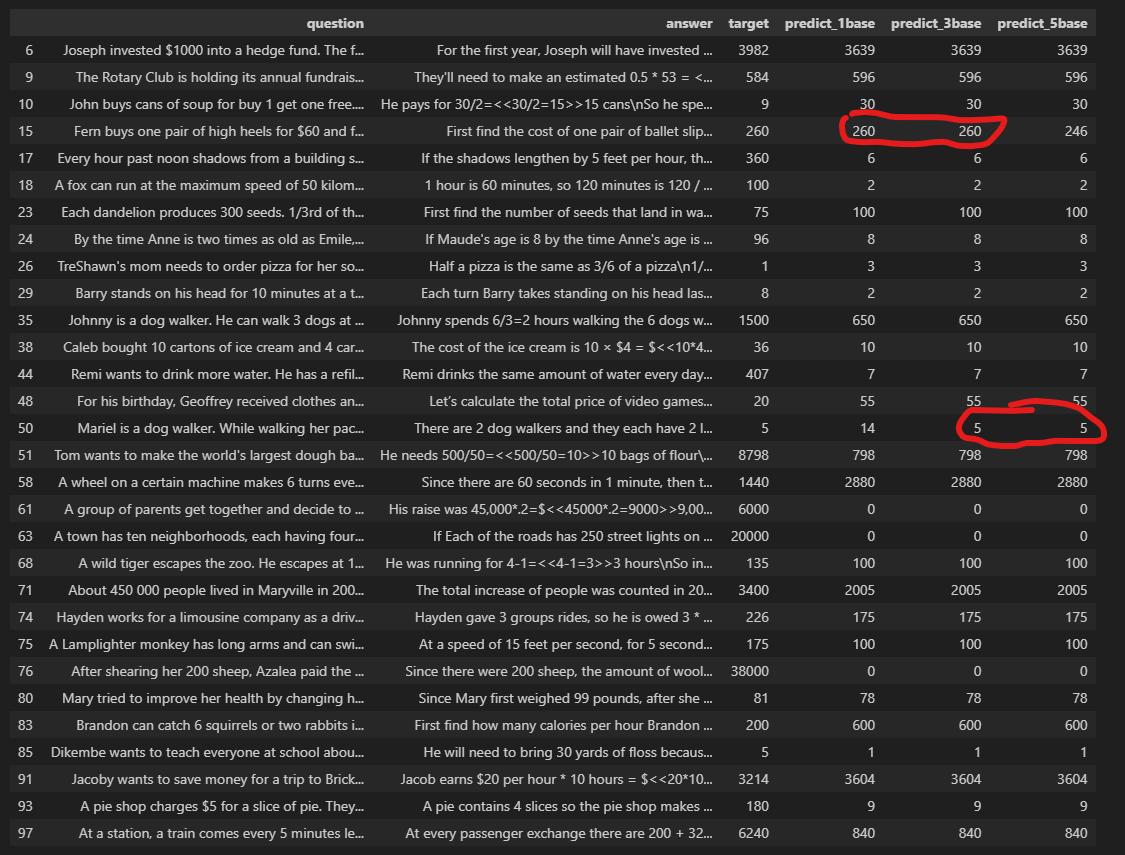

In [150]:
text = """First, let's calculate the total number of omelets needed based on the ticket sales:

Small children omelets = 53 * 0.5 = 26.5 (rounded up to 27 since you can't make half an omelet)
Older children omelets = 35 * 1 = 35
Adult omelets = 75 * 2 = 150
Senior omelets = 37 * 1.5 = 55.5 (rounded up to 56)

Now, let's add up the total number of omelets needed:

Total omelets = 27 + 35 + 150 + 56 = 273

Since they want to make 25 extra omelets, we add that to the total:

Total omelets with extra = 273 + 25 = 298

Finally, since they use 2 eggs for each omelet, we multiply the total number of omelets by 2 to find out how many eggs they need:

Eggs needed = 298 * 2 = 596

So, they will need to buy 596 eggs for the Omelet Breakfast."""

user_content = data_df.iloc[N_RECORD,0]

text_1 = get_mistral_response("I have a task: " + user_content + " Check the solution is it correct: " + text)
print (f"{text_1}")

The solution provided is correct. The total number of omelets needed was calculated accurately based on the ticket sales and the eating habits of each age group. The extra 25 omelets were added to the total, and the correct number of eggs needed was calculated by multiplying the total number of omelets by the number of eggs used per omelet. Therefore, the Rotary Club will need to buy 596 eggs for the Omelet Breakfast.


In [180]:
re.findall(r'\b\d+(?:\.\d+)?(?:\,\d+)?\b', "So, each parent would have to pay approximately $6,000 per year for the teacher's services 24 and 23.4.")

['6,000', '24', '23.4']

In [182]:
list_ = ['6,000', '24', '23.4']
for i in list_:
    i = i.replace(',', '')
    print(i)

6000
24
23.4


In [ ]:
# Function to open and read the API key file
def open_file(filepath):
    with open(filepath, "r", encoding='utf-8') as infile:
        return infile.read()

# Function to interact with the Mistral API and get a response
def get_mistral_response(user_content):
    
    # Load api key
    api_key = open_file("mistral_api_key.txt")
    client = MistralClient(api_key=api_key)

    # Prepare a List of ChatMessage objects with the user's content
    messages = [
        ChatMessage(role="system", content="You are a student that solves mathematical task. Add solution at the end of the output e.g. ####23"),
        ChatMessage(role="user", content=user_content),
        ]
    
    # Get the response from the Mistral API without streaming
    chat_response = client.chat(
        model=MODEL, 
        temperature=TEMPERATURE,
        top_p=TOP_P,
        messages=messages,
        )
    
    try:
        # Extract the content from the response
        response_content = " ".join([choice.message.content for choice in chat_response.choices]) if chat_response.choices else ""
    except AttributeError as e:
        print(f"An error occurred while processing the response: {e}")
        response_content = ""
    # Return the response content
               
    return response_content
